## Example oneD_dynamic_control.py
### Author: Joshua A. Marshall <joshua.marshall@queensu.ca>
#### GitHub: https://github.com/botprof/agv-examples

## SIMULATION SETUP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mobotpy.models

# Set the simulation time [s] and the sample period [s]
SIM_TIME = 30.0
T = 0.04

# Create an array of time values [s]
t = np.arange(0, SIM_TIME, T)
N = np.size(t)

ModuleNotFoundError: No module named 'mobotpy'

In [2]:
# %% FUNCTION DEFINITIONS

# Set the mass of the vehicle [kg]
m = 10.0

# Define the vehicle model matrices
F = np.array([[1, T], [0, 1]])
G = np.array([[T ** 2 / (2 * m)], [T / m]])

In [3]:
def vehicle(x, u, F, G):
    """Discrete-time 1D dynamic vehicle model."""
    x_new = F @ x + G @ [u]
    return x_new


def controller(x, K):
    """Proportional controller."""
    u = -K @ x
    return u

In [4]:
# %% RUN SIMULATION

# Initialize arrays that will be populated with our inputs and states
x = np.zeros((2, N))
u = np.zeros(N)

# Choose the controller gains
K = np.array([3.0, 4.0])

# Set the initial position [m], velocity [m/s], and force input [N]
x[0, 0] = 1.0
x[1, 0] = 0.0
u[0] = 0.0

# Run the simulation
for k in range(1, N):
    x[:, k] = vehicle(x[:, k - 1], u[k - 1], F, G)
    u[k] = controller(x[:, k], K)

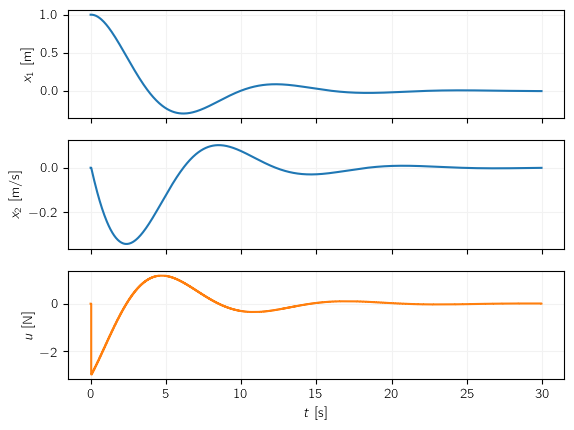

In [5]:
# %% MAKE A PLOT

# Change some plot settings (optional)
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{cmbright,amsmath}")
plt.rc("savefig", format="pdf")
plt.rc("savefig", bbox="tight")

# Plot the states (x) and input (u) vs time (t)
fig1 = plt.figure(1)
ax1a = plt.subplot(311)
plt.plot(t, x[0, :], "C0")
plt.grid(color="0.95")
plt.ylabel(r"$x_1$ [m]")
plt.setp(ax1a, xticklabels=[])
ax1b = plt.subplot(312)
plt.plot(t, x[1, :], "C0")
plt.grid(color="0.95")
plt.ylabel(r"$x_2$ [m/s]")
plt.setp(ax1b, xticklabels=[])
ax1c = plt.subplot(313)
plt.step(t, u, "C1", where="post")
plt.grid(color="0.95")
plt.ylabel(r"$u$ [N]")
plt.xlabel(r"$t$ [s]")

# Save the plot
#plt.savefig("../agv-book/figs/ch2/oneD_dynamic_control_fig1.pdf")

# %% MAKE AN ANIMATION

# Set the side length of the vehicle [m]
LENGTH = 1.0

# Let's use the Cart class to create an animation
#vehicle = Cart(LENGTH)

# Create and save the animation
#ani = vehicle.animate(x[0, :], T, True, "../agv-book/gifs/ch2/oneD_dynamic_control.gif")

# %%

# Show all the plots to the screen
plt.show()